# Shopping Behavior Exploratory Data Analysis

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
    - [Data Wrangling](#data-wrangling)
        - [Cleaning Headers](#cleaning-headers)
        - [Cleaning Column Elements](#cleaning-column-elements)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

[project intro]

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import requests

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('shopping_behavior_updated.csv', sep=',')
except:
    df = pd.read_csv('/datasets/shopping_behavior_updated.csv', sep=',')

[Back to Table of Contents](#back)

## Pre-Processing Data

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Duplicates

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [5]:
# Checking for null values
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

[Back to Table of Contents](#back)

### Removing Irrelevant Data

In [6]:
# Removing columns we do not need for this analysis
# Customer Id values are the same as the index value
# Frequency of Purchases value is vary similar to the previous purchases column
df = df.drop(columns=['Customer ID', 'Promo Code Used', 'Frequency of Purchases'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3900 non-null   int64  
 1   Gender                 3900 non-null   object 
 2   Item Purchased         3900 non-null   object 
 3   Category               3900 non-null   object 
 4   Purchase Amount (USD)  3900 non-null   int64  
 5   Location               3900 non-null   object 
 6   Size                   3900 non-null   object 
 7   Color                  3900 non-null   object 
 8   Season                 3900 non-null   object 
 9   Review Rating          3900 non-null   float64
 10  Subscription Status    3900 non-null   object 
 11  Shipping Type          3900 non-null   object 
 12  Discount Applied       3900 non-null   object 
 13  Previous Purchases     3900 non-null   int64  
 14  Payment Method         3900 non-null   object 
dtypes: f

[Back to Table of Contents](#back)

### Data Wrangling

#### Cleaning Headers

In [7]:
#checking for snakecase format
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Previous Purchases', 'Payment Method'],
      dtype='object')

In [8]:
# Renaming column names to snake_case format
df = df.rename(columns={'Age': 'age',
                        'Gender': 'gender',
                        'Item Purchased': 'item_purchased',
                        'Category': 'category',
                        'Purchase Amount (USD)': 'usd_purchase_total',
                        'Location': 'location',
                        'Size': 'size',
                        'Color': 'color',
                        'Season': 'season',
                        'Review Rating': 'customer_rating',
                        'Subscription Status': 'sub_status',
                        'Shipping Type': 'shipping_type',
                        'Discount Applied': 'discount_applied',
                        'Previous Purchases': 'previous_orders',
                        'Payment Method': 'payment_method'})
df.columns

Index(['age', 'gender', 'item_purchased', 'category', 'usd_purchase_total',
       'location', 'size', 'color', 'season', 'customer_rating', 'sub_status',
       'shipping_type', 'discount_applied', 'previous_orders',
       'payment_method'],
      dtype='object')

[Back to Table of Contents](#back)

#### Cleaning Column Elements

In [9]:
df.head()

,age,gender,item_purchased,category,usd_purchase_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal


In [26]:
# Converting all elements into snakecase format, removing all nonlegible characters, and converting data types 
# to reduce data usage
def clean_col(col):
    col = col.lower()
    col = col.strip()
    col = col.rstrip()
    col = col.replace(' ', '_')
    col = col.replace('[^a-zA-Z0-9_]', '')
    return col

df['gender'] = df['gender'].apply(clean_col)
df['gender'] = df['gender'].astype('category')

df['item_purchased'] = df['item_purchased'].apply(clean_col)

df['category'] = df['category'].apply(clean_col)
df['category'] = df['category'].astype('category')

df['location'] = df['location'].apply(clean_col)

df['size'] = df['size'].apply(clean_col)
df['size'] = df['size'].astype('category')

df['color'] = df['color'].apply(clean_col)

df['season'] = df['season'].apply(clean_col)
df['season'] = df['season'].astype('category')

df['sub_status'] = df['sub_status'].apply(clean_col)
df['sub_status'] = df['sub_status'].astype('category')

df['shipping_type'] = df['shipping_type'].apply(clean_col)
df['shipping_type'] = df['shipping_type'].astype('category')
df['shipping_type'] = df['shipping_type'].replace('express', 'paid_shipping').replace('next day air', 'paid_shipping').replace('standard', 'paid_shipping').replace('2-day shipping', 'paid_shipping').replace('store pickup', 'free_shipping')

df['discount_applied'] = df['discount_applied'].apply(clean_col)
df['discount_applied'] = df['discount_applied'].astype('category')

df['payment_method'] = df['payment_method'].apply(clean_col)
df['payment_method'] = df['payment_method'].astype('category')
df['payment_method'] = df['payment_method'].replace('venmo', 'payment_service').replace('credit_card', 'credit_debit_card').replace('paypal', 'payment_service').replace('bank_transfer', 'cash').replace('debit_card', 'credit_debit_card')

df.head(5)

,age,gender,item_purchased,category,usd_purchase_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method
0,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,paid_shipping,yes,14,payment_service
1,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,paid_shipping,yes,2,cash
2,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free_shipping,yes,23,credit_debit_card
3,21,male,sandals,footwear,90,rhode_island,m,maroon,spring,3.5,yes,next_day_air,yes,49,payment_service
4,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free_shipping,yes,31,payment_service


[Back to Table of Contents](#back)

## Exploratory Data Analysis

#### 1.1 Who are our main customer demographic?

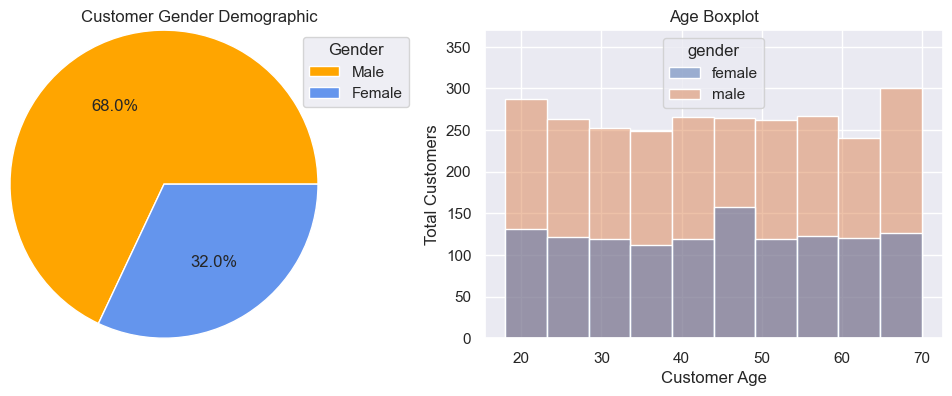

In [11]:
# Setting theme and figure size
sns.set_theme(style='darkgrid')
plt.figure(figsize=(13, 4))

# Since this is a fashion apparel business, the first key demographic characteristic is gender
# We need to find out if we cater to men, women, or both since products and marketing
# can vary depending on who is our main demographic.
plt.subplot(1, 2, 1)
df['gender'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%',
                                 fontsize=12,
                                 label='',
                                 labels=['', ''],
                                 colors=['orange', 'cornflowerblue'],
                                 radius=1.25)
plt.title('Customer Gender Demographic', loc='right')
plt.legend(['Male', 'Female'],
           title='Gender',
           loc=[0.95,.75])

# Fashion apparel widely varies between age and gender groups. By getting a 
# boxplot of customer ages and genders will reveal a lot about our customer demographic. 
plt.subplot(1, 2, 2)
sns.histplot(data=df,
             x='age',
             hue='gender',
             bins=10)
#sns.boxplot(df,x=df['gender'],y=df['age'])
plt.title('Age Boxplot')
plt.xlabel('Customer Age')
plt.ylabel('Total Customers')
plt.ylim(0, 370)
plt.show()

Observation:

-	Based on the dataset about 2/3 of customers are male customers and 1/3 are female customers

-	This shows that the sold fashion apparel products cater more towards men

-	This is important to factor because preferences in fashion apparel products can greatly differ between genders

-	The box plot shows there are no significant differences in age between genders

-	The average customer age ranges from 31-57 years old with the average customer being about 44

-	This tells us that our customers are on the older end of the age spectrum and usually prefer a more mature and refined sense of fashion preferences

-	Customers in this age range also tend to be in or entering the prime of their careers and will usually have more disposable income to spend on amenities

#### Which states contain the largest population of customers?

In [12]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

In [13]:
state_sales = df.groupby('location').agg({'usd_purchase_total': 'sum'}).to_dict()
state_data = pd.DataFrame.from_dict(state_sales)
# Giving the DataFrame and index
state_data.reset_index(inplace=True)
# Renaming columns of the DataFrame
state_data.rename(columns={'index': 'state', 'usd_purchase_total': 'total_state_sales'}, inplace=True)
state_data['state'] = state_data['state'].str.title()
state_data['state'] = state_data['state'].str.replace('_', ' ')
state_data['state'] = state_data['state'].replace(us_state_to_abbrev)
state_data.head()

,state,total_state_sales
0,AL,5261
1,AK,4867
2,AZ,4326
3,AR,4828
4,CA,5605


In [14]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [15]:
map_icons = state_data.copy()
map_icons['location_lat'] = ''
map_icons['location_long'] = ''
map_icons['state'] = map_icons['state'].replace(states)
map_icons['total_state_sales'] = 'Total State Revenue: $' + map_icons['total_state_sales'].astype('str')
# Renaming some states to help GeoPy find latitude and longitude more accurately
map_icons['state'] = map_icons['state'].replace('Washington', 'Washington State')
map_icons['state'] = map_icons['state'].replace('New York', 'New York State')

In [16]:
# Using GeoPy to pull latitude and longitude data for the map
geolocator = Nominatim(user_agent='myApp')

for i in map_icons.index:
    try:
        # GeoPy retrieving address from city
        location = geolocator.geocode(map_icons['state'][i])
        
        # Appending lat/long values to column using dataframe location
        map_icons.loc[i,'location_lat'] = location.latitude
        map_icons.loc[i,'location_long'] = location.longitude

    except:
        # Exception for the locations where no value is retrieved and 
        # appends null value to column
        map_icons.loc[i,'location_lat'] = ''
        map_icons.loc[i,'location_long'] = ''

map_icons

,state,total_state_sales,location_lat,location_long
0,Alabama,Total State Revenue: $5261,33.258882,-86.829534
1,Alaska,Total State Revenue: $4867,64.445961,-149.680909
2,Arizona,Total State Revenue: $4326,34.395342,-111.763275
3,Arkansas,Total State Revenue: $4828,35.204888,-92.447911
4,California,Total State Revenue: $5605,36.701463,-118.755997
5,Colorado,Total State Revenue: $4222,38.725178,-105.607716
6,Connecticut,Total State Revenue: $4226,41.65002,-72.734216
7,Delaware,Total State Revenue: $4758,38.692045,-75.401331
8,Florida,Total State Revenue: $3798,27.756767,-81.463983
9,Georgia,Total State Revenue: $4645,32.329381,-83.113737


In [17]:
map_icons = map_icons.values.tolist()

In [18]:
# 
us_map = folium.Map([43, -100], 
                    zoom_start=4,
                    font_size=15)

us_states = requests.get('https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json').json()

folium.Choropleth(geo_data=us_states,
                  data=state_data,
                  line_weight=1.5,
                  columns=['state', 'total_state_sales'],
                  key_on='feature.id',
                  fill_color='RdYlGn',
                  legend_name='Total State Revenue',
                  highlight=True).add_to(us_map)

# Loop to create map markers and circle markers
for col in map_icons:
    folium.Marker(location=[col[2], col[3]],
                  tooltip=col[0],
                  popup=col[1],
                  icon=folium.Icon(color='red',
                                    icon='info-sign')).add_to(us_map)
    
    folium.CircleMarker(location=[col[2], col[3]],
                        radius=10,
                        popup=col[0],
                        color='red',
                        fill_color='red').add_to(us_map)

us_map.save('us_map.html')
us_map

Observation:

- The results show Montana, Illinois, California, Idaho, and Nevada are where our largest customer demographic is from. 

- Seeing how the highest grossing state is Montana with a little over $5700 in sales, this is still a growing business in their growth phase of the business cycle. 

-	It is interesting to see states like Montana, Idaho, and Nevada ranking in the top five despite being smaller states based on population. 

-	This shows that there are also opportunities to significantly grow in the larger states like California and New York.

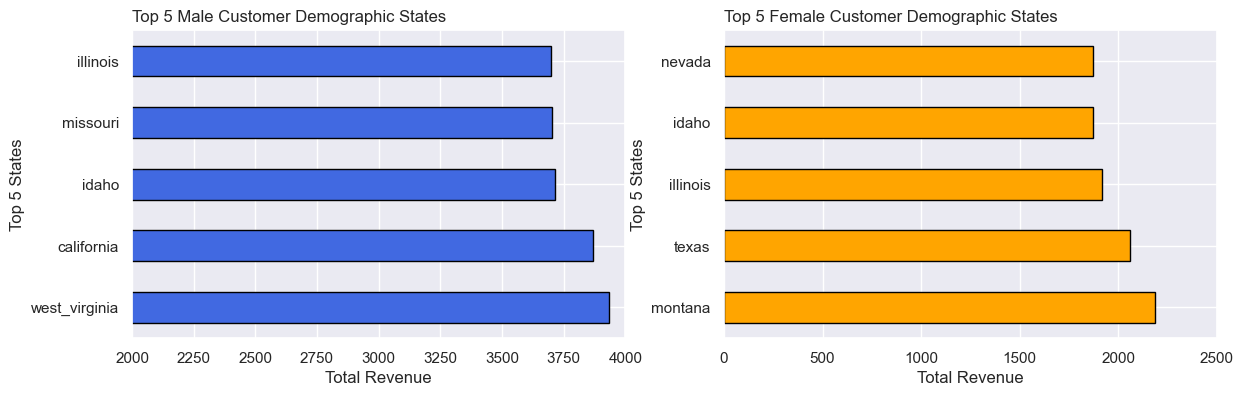

In [19]:
# 
plt.figure(figsize=(14, 4))

# It is also important to find which states has the largest demographic of male and female customers
# are from so we have the option to perform more targeted marketing since our male and female customers
# are widely different in age and cultural preferences.
# To find where are our male demographic are from we first filter the genders column to equale males
# and then we group the dataset by location and total the sum generated for those locations.
plt.subplot(1, 2, 1)
df[df['gender'] == 'male'].groupby('location')['usd_purchase_total'].sum().sort_values(ascending=False).head(5).plot(kind='barh',
                                                                                                                     color='royalblue',
                                                                                                                     edgecolor='black')
plt.title('Top 5 Male Customer Demographic States', loc='left')
plt.xlabel('Total Revenue')
plt.xlim([2000, 4000])
plt.ylabel('Top 5 States')

# Now we are looking for the states with the largest groups of our female customers
# To find where are our female demographic we filter the genders column to equal female
# and then we group the dataset by location and total the sum generated for those locations.
plt.subplot(1, 2, 2)
df[df['gender'] == 'female'].groupby('location')['usd_purchase_total'].sum().sort_values(ascending=False).head(5).plot(kind='barh',
                                                                                                                       color='orange',
                                                                                                                       edgecolor='black')
plt.title('Top 5 Female Customer Demographic States', loc='left')
plt.xlabel('Total Revenue')
plt.xlim([0, 2500])
plt.ylabel('Top 5 States')
plt.show()

Observation:

-	By grouping only, the male customers it reveals some differences in the top 5 locations changing to West Virginia, California, Idaho, Missouri, and Illinois

-	This also tells us that our male and female demographic preferences can differ widely from state to state indicating that a targeted marketing effort could perform better than just a general marketing effort depending on the produc

-	The top five states with our female customers include Montana, Texas, Illinois, Idaho, and Nevada

-	This list is mostly in sync with the overall top 5 states except for Texas

-	Should we want to run a targeted marketing campaign for our women’s product line, the first state that we should target would be Texas since it is also the largest total addressable market compared to Montana

[Back to Table of Contents](#back)

#### 1.2 Which products are the best sellers? In which size? Color?

In [20]:
products_total_rev = df.groupby('item_purchased').agg({'usd_purchase_total': 'sum'}).to_dict()
product_rev_df = pd.DataFrame.from_dict(products_total_rev)
product_rev_df.reset_index(inplace=True)
product_rev_df.rename(columns={'index': 'product', 'usd_purchase_total': 'total_sales'}, inplace=True)
product_rev_df

,product,total_sales
0,backpack,8636
1,belt,9635
2,blouse,10410
3,boots,9018
4,coat,9275
5,dress,10320
6,gloves,8477
7,handbag,8857
8,hat,9375
9,hoodie,8767


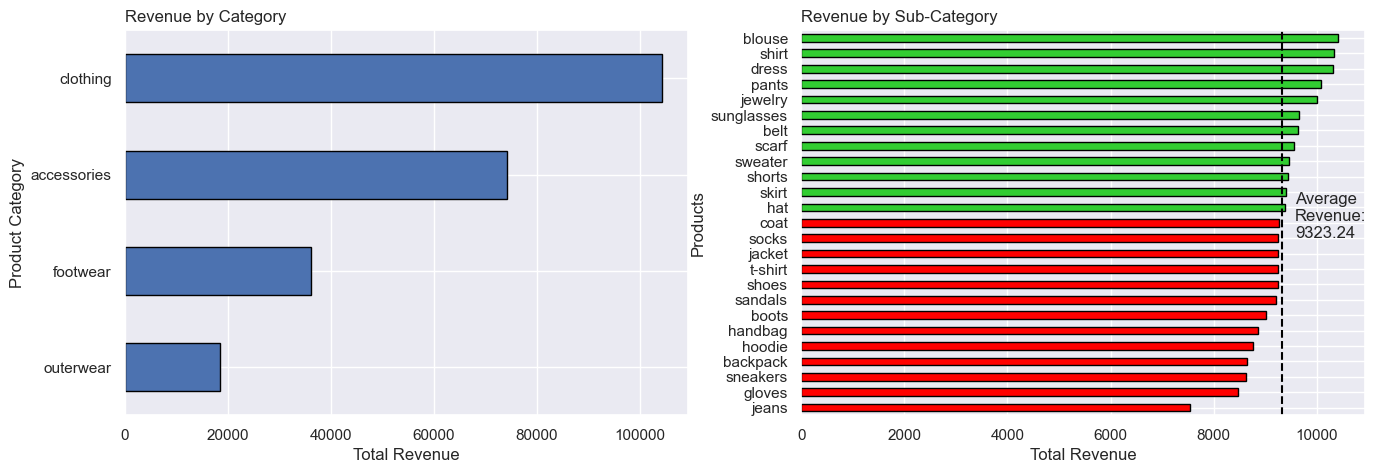

In [21]:
# 
plt.figure(figsize=(16, 5))

# Now we need find the average customer rating for each product category to see which 
# category customers rate highly
plt.subplot(1, 2, 1)
df.groupby(['category'])['usd_purchase_total'].sum().sort_values().plot(kind='barh',
                                                                        edgecolor='black')
plt.title('Revenue by Category', loc='left')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')

# To find the average customer rating for each product we need to group the item_purchased column, 
# find the mean of the customer_rating column, and plot the results. It would also be helpful to see 
# which items were rated higher and below average so I will include a line to represent the average 
# item rating and color coordinate items rated below and above average. 
plt.subplot(1, 2, 2)
product_rev = df.groupby(['item_purchased'])['usd_purchase_total'].sum().sort_values()
avg_rev = product_rev_df['total_sales'].mean()

col = []
for i in product_rev:
    if i >= avg_rev:
        col.append('limegreen')
    else:
        col.append('red')

product_rev.plot(kind='barh',
                     color=col,
                     edgecolor='black')
plt.title('Revenue by Sub-Category', loc='left')
plt.axvline(x=avg_rev, 
            color='black', 
            linestyle='--')
plt.text((avg_rev + 250), 11, f'Average\nRevenue:\n{avg_rev.round(2)}')
plt.xlabel('Total Revenue')
plt.ylabel('Products')
plt.show()

Observation:

-	Grouping each category by their average rating shows us that our footwear had the highest rating and clothing had the lowest rating. 

-	This is an interesting outcome since most of the items sold are clothing products. This could be due to the clothing products reaching a larger audience in which there will be more less satisfied customers who are also more likely to leave a negative review than a happy customer.

-	From these results it leads us to look at each unique sold product to see which items were not as well received.


Observation:

-	This graph reveals which specific product had a higher or lower rating when compared to the overall average rating. 

-	Unsurprisingly, it shows that generally footwear and accessory products were rated more positively than clothing products. 

-	The lower rating on clothing products could give enough reason to reevaluate at how quality control is conducted and to contact the manufacturing department, the supplier of our clothes, and/or product designers to see if any issues along the supply chain can be solved. 

-	Many of the lowest-rated products, shirts, jeans, and pants, are some of the most basic clothing items and should be rated higher since those are the most common items customers buy when shopping for clothes.

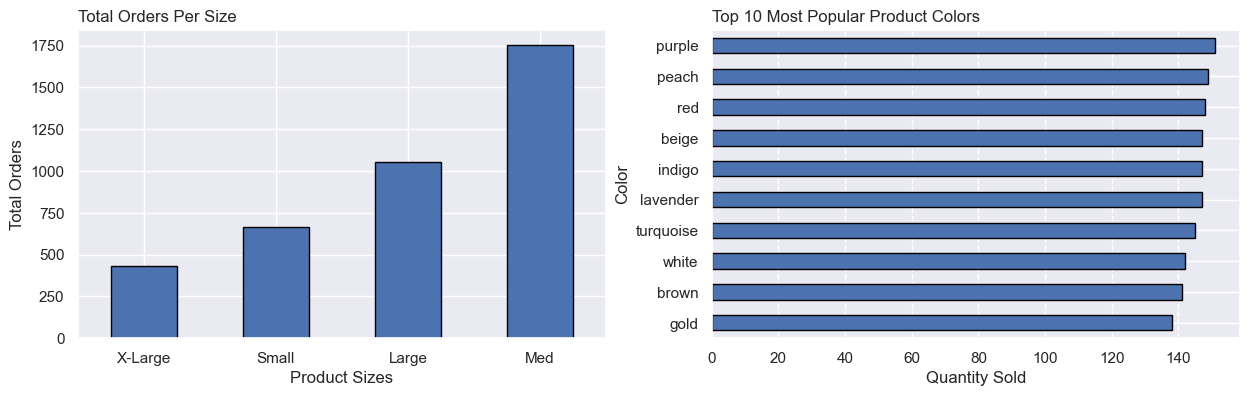

In [22]:
# 
plt.figure(figsize=(15, 4))

# If it is applicable, we should find which sizes are the most 
# popular sizes purchased by our customers. 
plt.subplot(1, 2, 1)
df['size'].value_counts().sort_values().plot(kind='bar',
                                             edgecolor='black')
plt.title('Total Orders Per Size', loc='left')
plt.xlabel('Product Sizes')
plt.xticks([0, 1, 2, 3], ['X-Large', 'Small', 'Large', 'Med'], rotation=0)
plt.ylabel('Total Orders')

# It would be interesting to also see which colors are the most popular for items sold.
plt.subplot(1, 2, 2)
df['color'].value_counts().sort_values().head(10).plot(kind='barh',
                                                       edgecolor='black')
plt.title('Top 10 Most Popular Product Colors ', loc='left')
plt.grid(axis='x', linestyle='--')
plt.xlabel('Quantity Sold')
plt.ylabel('Color')
plt.show()

Observation:

-	It is interesting that about half of the most popular colors sold are eccentric colors or neutral / earth-tone-like colors. 

-	Generally, neutral and other subtle colors tend to perform better long term since those are timeless colors so we should focus on products with those colors.

-	It would be interesting to see if a trendy / avant garde line of products would perform well with customers who have eccentric fashion preferences.

Observation:

-	Most customers purchase medium and/or large-sized products.

#### What is the customer sentiment about the business?

In [23]:
# Finding the range in which our products are rated by customers
df.agg({'customer_rating': ['min', 'mean', 'max']}).round(3)

,customer_rating
min,2.50
mean,3.75
max,5.00


Observation:

-	The lowest rating was 2.5/5, the highest rating was of 5/5, and the average overall rating, encompassing all products, was 3.7/5. 

-	Most customers are more likely to rate a negative review when rating a product. This signals to the business that the sold products were seen as average at worst, and perfect at best, which is a overall positive sign of market sentiment about the business and its products.

##### 1.4 What are the customer's prefered method of transaction?

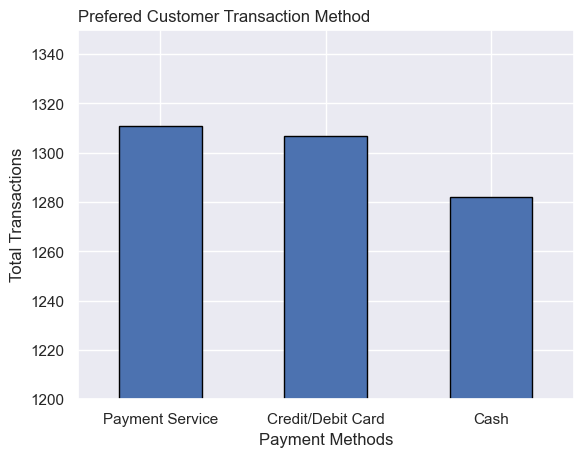

In [41]:
# To find the total number of users per payment method we can use value_counts on the 
# payment_method column

df['payment_method'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                                                      edgecolor='black')
plt.title('Prefered Customer Transaction Method', loc='left')
plt.xlabel('Payment Methods')
plt.xticks([0, 1, 2], ['Payment Service', 'Credit/Debit Card', 'Cash'], rotation=0)
plt.ylabel('Total Transactions')
plt.ylim([1200, 1350])
plt.show()

Observation:

-	Based on the data, shows that payment services are the most popular form of customer payment

-	For most e-commerce businesses, by increasing the variety of accepted payment services, the more likely new customers will purchase products

-	Currently, accepted payment services are Venmo and PayPal, if payment services can expand to other popular payment services like Cash App, Apple Pay, Google Pay, and Amazon Pay, then new customers are more likely to shop at this business due to increased customer conveniency

[Back to Table of Contents](#back)

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

syntax:
[Dataset creator's name]. ([Year &amp; Month of dataset creation]). [Name of the dataset], [Version of the dataset]. Retrieved [Date Retrieved] from [Kaggle](URL of the dataset).

example:
Tatman, R. (2017, November). R vs. Python: The Kitchen Gadget Test, Version 1. Retrieved December 20, 2017 from https://www.kaggle.com/rtatman/r-vs-python-the-kitchen-gadget-test.

[Back to Table of Contents](#back)